# Fase 3: Agrupación de variables

En esta fase se agrupan y agregan aquellas variables que se puedan agregar en tipos de datos más genéricos.

- La categorización (agrupación) consiste en estructurar información: crear un orden jerarquico a partir de la complejidad.
- Las categorías se forman en función de la entidad con valores de atributos comunes, y presenta diferentes perspectivas.
- Las categorías permiten organizar o reorganizar los datos.
- Permite crear características para cualquier modelo de aprendizaje automático que pueda suceder posteriormente.

En esta fase podrían abordarse las siguientes tareas:

- Agregación de categorías
- Agrupación de variables continuas
- Agrupación (_clustering_)

In [3]:
import pandas as pd

vehiculos = pd.read_csv('./output/vehiculos-2-limpio_analisis.csv')
vehiculos.head(5)

fabricante               modelo  year  desplazamiento  cilindros  \
0        AM General    DJ Po Vehicle 2WD  1984             2.5        4.0   
1        AM General     FJ8c Post Office  1984             4.2        6.0   
2        AM General  Post Office DJ5 2WD  1985             2.5        4.0   
3        AM General  Post Office DJ8 2WD  1985             4.2        6.0   
4  ASC Incorporated                  GNX  1987             3.8        6.0   

       transmision          traccion                        clase combustible  \
0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
1  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
2  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
3  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
4  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars     Premium   

   rendimiento         co2  
0           17  522.764706  
1           13  683.615385  
2           16  555.437500  
3           13  683.615385  
4           16  555.437500

La primera forma de crear categorías adicionales es identificando oportunidades para crear categorías de nivel superior a partir de atributos que ya existen.

En el caso de estudio, es posible obtener el número de valores únicos y el tipo de datos para cada atríbuto.

In [4]:
def valores_unicos_por_columna(dframe):
    for col in dframe:
        print("{:5} ({}): {}".format(
            len(dframe[col].unique()), 
            dframe[col].dtype,
            dframe[col].name
        ))

valores_unicos_por_columna(vehiculos)

  133 (object): fabricante
 3791 (object): modelo
   35 (int64): year
   66 (float64): desplazamiento
    9 (float64): cilindros
   37 (object): transmision
    7 (object): traccion
   34 (object): clase
   14 (object): combustible
   84 (int64): rendimiento
  597 (float64): co2


## Agregación de variables categóricas

Considere el atributo `transmisión` que contiene la siguiente cantidad de valores:

In [5]:
len(vehiculos['transmision'].unique())

37

Al examinar las categorías se identifica que los valores pueden ser categorizados en uno de dos tipos de transmisión: `Automatica` o `Manual`.

[DataFrame.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [6]:
vehiculos['transmision'].value_counts().head(10)

Automatic 4-spd    10599
Manual 5-spd        7901
Automatic 3-spd     2762
Automatic (S6)      2736
Manual 6-spd        2469
Automatic 5-spd     2165
Automatic 6-spd     1461
Manual 4-spd        1318
Automatic (S8)      1085
Automatic (S5)       825
Name: transmision, dtype: int64

La nueva columna `tipo-transmision` contiene uno de dos valores `Automatica` para todos los valores de `transmision` que comienzan con `A` y, el valor `Manual` para todos aquellos valores de `transmision` que comienzan con `M`.

[DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) selección por índice (row, col); [Series.str.startswith](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html)

In [7]:
vehiculos.loc[ vehiculos['transmision'].str.startswith('A'), 'tipo-transmision' ] = 'Automatica'
vehiculos.loc[ vehiculos['transmision'].str.startswith('M'), 'tipo-transmision' ] = 'Manual'

In [8]:
vehiculos.head()

fabricante               modelo  year  desplazamiento  cilindros  \
0        AM General    DJ Po Vehicle 2WD  1984             2.5        4.0   
1        AM General     FJ8c Post Office  1984             4.2        6.0   
2        AM General  Post Office DJ5 2WD  1985             2.5        4.0   
3        AM General  Post Office DJ8 2WD  1985             4.2        6.0   
4  ASC Incorporated                  GNX  1987             3.8        6.0   

       transmision          traccion                        clase combustible  \
0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
1  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
2  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
3  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
4  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars     Premium   

   rendimiento         co2 tipo-transmision  
0           17  522.764706       Automatica  
1           13  683.615385       Automatica  
2           16  555.437500       Automatica  
3           13  683.615385       Automatica  
4           16  555.437500       Automatica

__NOTA__: Pandas incluye un `dtype` especial para variables categoricas llamado `category`. El especificar que un campo es `category` en vez de un `object` (generalmente `str`) extiende las funcionalidades que podemos usar. Además, las categorías en general ocupan menos espacio en memoria (si su cardinalidad no es muy elevada).

[DataFrame.astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) convierte un objeto pandas en un dtype especificado.

In [9]:
vehiculos['tipo-transmision'] = vehiculos['tipo-transmision'].astype("category")
vehiculos['tipo-transmision'].dtype

CategoricalDtype(categories=['Automatica', 'Manual'], ordered=False)

In [10]:
vehiculos['tipo-transmision'].value_counts()

Automatica    25076
Manual        11854
Name: tipo-transmision, dtype: int64

La variable `combustible` contiene 13 valores,

In [11]:
vehiculos['combustible'].value_counts() # E85: Etanol

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

Podrían categorizarse en `tipo-combustible`,
- `Normal` para vehiculos que usen combustible `Regular`
- `Premium` para vehiculos que usen combustible `Premium`
- `Hibrido` para vehiculos que usen `Electricity`
- `Otros` para vehículos que usen cualquier otro tipo de combustible

In [12]:
vehiculos['tipo-combustible'] = 'Otros' # valores de otro tipo (para todos)
vehiculos.loc[vehiculos['combustible'] == 'Regular', 'tipo-combustible'] = 'Normal'
vehiculos.loc[vehiculos['combustible'] == 'Premium', 'tipo-combustible'] = 'Premium'
vehiculos.loc[vehiculos['combustible'].str.contains('Electricity'), 'tipo-combustible'] = 'Hibrido'
vehiculos['tipo-combustible'] = vehiculos['tipo-combustible'].astype("category")

In [13]:
vehiculos['tipo-combustible'].value_counts()

Normal     24078
Premium    10206
Otros       2437
Hibrido      209
Name: tipo-combustible, dtype: int64

## Agrupación de variables contínuas

Las variables contínuas podrías ser agrupadas por medio de un umbral o de una distribución.

Una forma intuítiva de hacerlo, es por medio del uso de __quintiles__. Esta forma define una categoría media, otras dos categorías moderadamente más altas y más bajas, y luego, dos categorías extremas.

- Los __quintiles__ son cuantiles (puntos) que dividen en 5 intervalos regulares la función de distribución de una variable aleatoria: 0.20, 0.40, 0.60, y 0.80.

Para los niveles de emisión de CO2, los datos se agregan en 5 categorías,

[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) discretiza una variable en cubos de igual tamaño según el rango o según los cuantiles de muestra.

In [14]:
categoria_emision = ['muy baja', 'baja', 'moderada', 'alta', 'muy alta']    # etiquetas de categorias
vehiculos['emision-contaminante'] = pd.qcut(vehiculos['co2'], 5, categoria_emision)
vehiculos.head()

fabricante               modelo  year  desplazamiento  cilindros  \
0        AM General    DJ Po Vehicle 2WD  1984             2.5        4.0   
1        AM General     FJ8c Post Office  1984             4.2        6.0   
2        AM General  Post Office DJ5 2WD  1985             2.5        4.0   
3        AM General  Post Office DJ8 2WD  1985             4.2        6.0   
4  ASC Incorporated                  GNX  1987             3.8        6.0   

       transmision          traccion                        clase combustible  \
0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
1  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
2  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
3  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
4  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars     Premium   

   rendimiento         co2 tipo-transmision tipo-combustible  \
0           17  522.764706       Automatica           Normal   
1           13  683.615385       Automatica           Normal   
2           16  555.437500       Automatica           Normal   
3           13  683.615385       Automatica           Normal   
4           16  555.437500       Automatica          Premium   

  emision-contaminante  
0                 alta  
1             muy alta  
2                 alta  
3             muy alta  
4                 alta

Para el rendimiento, se definen 5 categorías de nivel de consumo: 

In [15]:
categoria_nivel_rendimiento = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']
vehiculos['nivel-rendimiento'] = pd.qcut(vehiculos['rendimiento'], 5, categoria_nivel_rendimiento)
vehiculos.head(5)

fabricante               modelo  year  desplazamiento  cilindros  \
0        AM General    DJ Po Vehicle 2WD  1984             2.5        4.0   
1        AM General     FJ8c Post Office  1984             4.2        6.0   
2        AM General  Post Office DJ5 2WD  1985             2.5        4.0   
3        AM General  Post Office DJ8 2WD  1985             4.2        6.0   
4  ASC Incorporated                  GNX  1987             3.8        6.0   

       transmision          traccion                        clase combustible  \
0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
1  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
2  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
3  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD     Regular   
4  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars     Premium   

   rendimiento         co2 tipo-transmision tipo-combustible  \
0           17  522.764706       Automatica           Normal   
1           13  683.615385       Automatica           Normal   
2           16  555.437500       Automatica           Normal   
3           13  683.615385       Automatica           Normal   
4           16  555.437500       Automatica          Premium   

  emision-contaminante nivel-rendimiento  
0                 alta              bajo  
1             muy alta          muy bajo  
2                 alta          muy bajo  
3             muy alta          muy bajo  
4                 alta          muy bajo

Otras agrupaciones que podrían ser aplicadas:

- Considerando que existen 35 clases de vehiculos, la nueva variable `clase-tipo` podría agrupar clases en las siguientes 8 categorías:
    - Auto pequeño: `compact cars`, `subcompact cars`, `two seaters`, `minicompact cars`.
    - Auto mediano: `midsize Cars`
    - Autos grande: `large Cars`
    - Station Wagon: clases de vehículos con la palabra `station`
    - Pickup: clases de vehiculos que son `trucks`
    - Especiale: clases devehículos que son `special purpose`
    - Deportivo: clases de vehículos que son `sport utility`
    - Van-Minivan: clases de vehículos que son de tipo `van` o `minivan`.
- Las categorías de motores podrían ser agrupados (por ejemplo en 5 grupos) de acuerdo con los valores de la variable `desplazamiento`.

## Análisis de resultados

Las primeras filas del _dataset_ obtenido luego de agrupar las variables,

In [16]:
vehiculos[['tipo-transmision', 'tipo-combustible', 'emision-contaminante', 'nivel-rendimiento']].head(10)

tipo-transmision tipo-combustible emision-contaminante nivel-rendimiento
0       Automatica           Normal                 alta              bajo
1       Automatica           Normal             muy alta          muy bajo
2       Automatica           Normal                 alta          muy bajo
3       Automatica           Normal             muy alta          muy bajo
4       Automatica          Premium                 alta          muy bajo
5       Automatica           Normal                 baja              alto
6           Manual           Normal             muy baja              alto
7       Automatica           Normal             moderada          moderado
8       Automatica           Normal                 baja              alto
9           Manual           Normal             muy baja              alto

permite detectar que `nivel-rendimiento` y `emision-contaminante` están inversamente correlacionadas, es decir:

- Vehículos con bajo rendimiento tienen una alta emisión de CO2 y viceversa. 

Esta conclusión se ajusta bastante a la lógica, dado que, aquellos vehículos con un menor rendimiento, consumen mayor cantidad de combustible y por lo tanto son más contaminantes. 

Para complementar el análisis es recomienda __analizar la relación entre las variables__, por ejemplo, utilizando y gráfico de dispersión entre las variables `rendimiento` y `co2`.

<AxesSubplot:title={'center':'Rendimiento VS Emisión CO2'}, xlabel='rendimiento', ylabel='co2'>

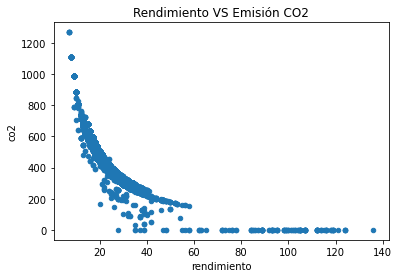

In [39]:
vehiculos.plot.scatter(
    x = 'rendimiento',
    y = 'co2',
    title = 'Rendimiento VS Emisión CO2'
    )

En consecuencia, la variable `rendimiento` refleja la eficiencia del vehículo. Esto es coherente con la descricpción del _dataset_ en la cual se establece que el rendimiento es expresado en _Miles/Galon_

Es importante notar que, en la descripción del _dataset_, se indica que la emisión de CO2 se mide en GPM (_Grames/Mile_), mientras que el rendimiento se mide en _Miles/Galon_. Por lo tanto, __un análisis riguroso debe realizarse sobre valores expresados en unidades comparables__, en este caso, el rendimiento es convertido a litros por milla.

<AxesSubplot:title={'center':'Rendimiento VS Emisión CO2'}, xlabel='rendimiento-litros_milla', ylabel='co2'>

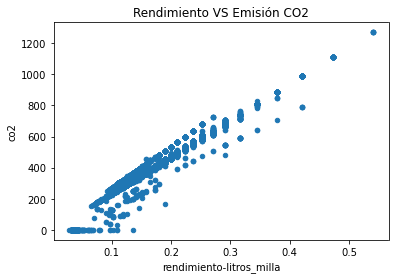

In [17]:
litros_por_galon = 3.78541
vehiculos['rendimiento-litros_milla'] = litros_por_galon/vehiculos['rendimiento']
vehiculos.plot.scatter(
    x = 'rendimiento-litros_milla',
    y = 'co2',
    title = 'Rendimiento VS Emisión CO2'
    )

Otros análisis sugeridos:

- Análisis de la evolución en el tiempo de los niveles de emisión de CO2, a partir de la agrupación de modelos de vehículos (`clase-tipo`).
- Identificar los modelos de vehículos (`marca + modelo`) que más contaminan en el último tiempo.

## Exportar datos procesados

- Generalmente, un formato muy extendido para el intercambio de datos es CSV.

- CSV (_Comma Separated Values_), es un formato muy simple y _transparente_ que consiste de un elemento for fila, y cada campo separado por una coma.

- Al almacenar datos (pre)procesados en formato CSV se pierde información (_metadata_) de las estructuras de datos de Pandas (e.g., tipos de variables).

- Es recomendable usar formatos nativos de Python para almacenar de los datos entre etapas del procesamiento (entre fases). 

- Para distribuir (o compartir datos) se recomienda el uso de formatos de intercambio (e.g., CSV, TXT, ASCII)

El formato standard de serialización (en terminos prácticos, almacenar datos) en Python es [`pickle`](https://docs.python.org/3/library/pickle.html). En este tipo de dato, __las estructuras de datos no pierden sus propiedades__.

In [18]:
vehiculos.to_pickle('./output/vehiculos-3-variables_agrupadas.pkl')